# # TSF- GRIP DECEMBER-22



## Task 1 : Prediction using Supervised ML

### Author : Shravani Bhagwat

### Predict the percentage of an student based on the no. of study hours

### Import python libraries

In [1]:
#Import all libraries required in this notebook

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import sklearn


In [2]:
# Reading data from remote link
website = 'http://bit.ly/w-data'
data = pd.read_csv(website)
print("Data imported successfully")

data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.shape

(25, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Visualize the data

<AxesSubplot:>

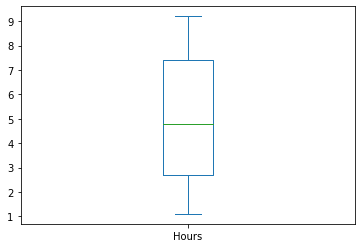

In [7]:
#Checking if there is any outliers in the data set or not
data['Hours'].plot.box()

<AxesSubplot:>

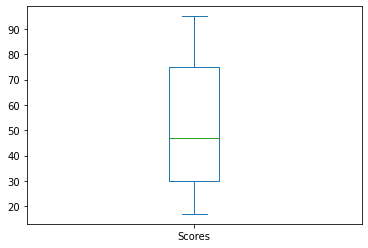

In [12]:
data['Scores'].plot.box()

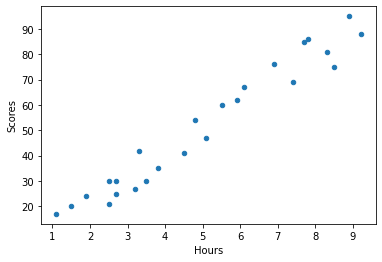

In [14]:
# Plotting the data into scatter plot to see the relationship
data.plot(kind = 'scatter', x = 'Hours', y = 'Scores')
plt.show()

Above prediction shows that fairly relationship is there

In [15]:
# Let's check the relationship with correlation matrix

data.corr(method = 'pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [17]:
data.corr(method = 'spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


### Linear Regression

In [18]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [19]:
#Splitting the dataset into Testing and Training

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)


In [20]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

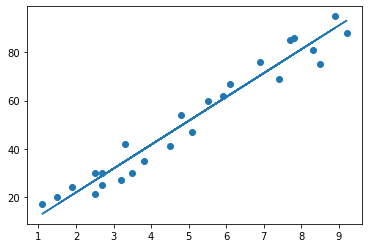

In [21]:
m = reg.coef_
c = reg.intercept_
line = m*x+c
plt.scatter(x, y)
plt.plot(x, line)
plt.show()

### Visualizing the model 

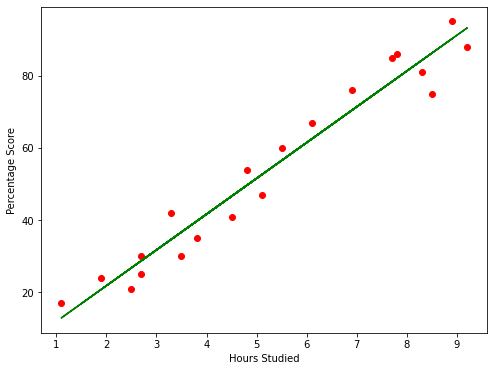

In [22]:
plt.rcParams['figure.figsize']=[8,6]
plt.scatter(x_train,y_train,color='red')
plt.plot(x,line,color = 'green')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [23]:
print(x_test)
y_pred = reg.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [25]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [26]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

### What will be the predicted score if a student studies 9.25 Hours/Day ? 

In [28]:
new_hours = 9.25
new_pred = reg.predict([[new_hours]])
print('Predicted Score = {}'.format(new_pred[0]))


Predicted Score = 93.69173248737538


### Model Evaluation

In [31]:
from sklearn import metrics 
from sklearn.metrics import r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('R2 Score', r2_score(y_test, y_pred))


Mean Absolute Error: 4.183859899002975
R2 Score 0.9454906892105356
